In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import mpld3
#mpld3.enable_notebook()

In [2]:
#plt.rcParams["figure.figsize"] = (9, 6) # (w, h)

# NORMAL PLOT

In [3]:
dataset = pd.read_csv('.\\files\\data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
from sklearn.impute import SimpleImputer
#help(SimpleImputer)
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(dataset.iloc[:,1:3])
dataset.iloc[:,1:3] = imputer.transform(dataset.iloc[:,1:3])
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [5]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

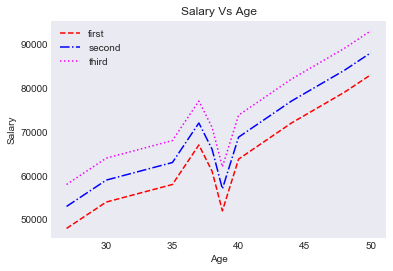

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

In [6]:
plt.style.use('seaborn-dark')
df_sort = dataset.sort_values('Age')
plt.plot(df_sort.iloc[:,1:2], df_sort.iloc[:,2:3], color='red', linestyle='--', label='first')
plt.plot(df_sort.iloc[:,1:2], df_sort.iloc[:,2:3]+5000, color='blue', linestyle='-.', label='second')
plt.plot(df_sort.iloc[:,1:2], df_sort.iloc[:,2:3]+10000, color='#f003fc', linestyle=':', label='third')
plt.title('Salary Vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='best')
plt.show()
help(plt.legend)

# BAR PLOT

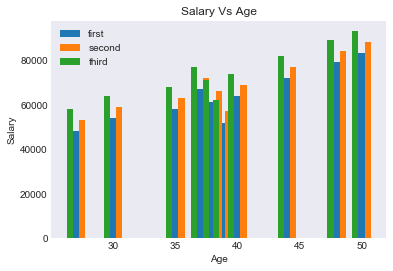

In [7]:
x_range = df_sort.iloc[:,1].values
width = 0.5
plt.bar(x_range, df_sort.iloc[:,2].values, label='first')
plt.bar(x_range + width, df_sort.iloc[:,2].values+5000, width=width, label='second')
plt.bar(x_range - width, df_sort.iloc[:,2].values+10000, width=width, label='third')
plt.title('Salary Vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='best')
plt.show()


# BAR HORIZONTAL

In [8]:
df = pd.read_csv('.\\files\\data_plot.csv')
df.head()

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [9]:
from collections import Counter

counter = Counter()
for i in range(len(df)):
    counter.update(df.loc[i,'LanguagesWorkedWith'].split(';'))
print(counter.most_common())    

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833), ('Swift', 5744), ('Kotlin', 5620), ('R', 5048), ('VBA', 4781), ('Objective-C', 4191), ('Scala', 3309), ('Rust', 2794), ('Dart', 1683), ('Elixir', 1260), ('Clojure', 1254), ('WebAssembly', 1015), ('F#', 973), ('Erlang', 777)]


In [10]:
languages = []
popularity = []

for item in counter.most_common():
    languages.append(item[0])
    popularity.append(item[1])
print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly', 'Swift', 'Kotlin', 'R', 'VBA', 'Objective-C', 'Scala', 'Rust', 'Dart', 'Elixir', 'Clojure', 'WebAssembly', 'F#', 'Erlang']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833, 5744, 5620, 5048, 4781, 4191, 3309, 2794, 1683, 1260, 1254, 1015, 973, 777]


In [11]:
#😎

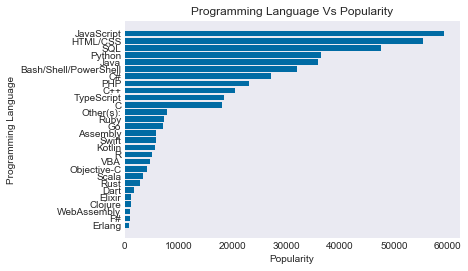

In [12]:
plt.style.use('tableau-colorblind10')
languages.reverse()
popularity.reverse()
plt.barh(languages, popularity)
plt.title('Programming Language Vs Popularity')
plt.xlabel('Popularity')
plt.ylabel('Programming Language')
plt.show()
#help(plt.barh)

# PIE CHART 

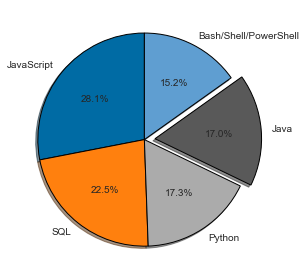

In [13]:
languages = ['JavaScript','SQL','Python','Java','Bash/Shell/PowerShell']
popularity = [59219, 47544, 36443, 35917, 31991, ]
plt.pie(popularity, labels=languages, shadow=True, explode=[0,0,0,0.1,0], startangle=90, 
        wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')
plt.tight_layout()
plt.show()
#help(plt.pie)

# PLOT WITH FILL BETWEEN

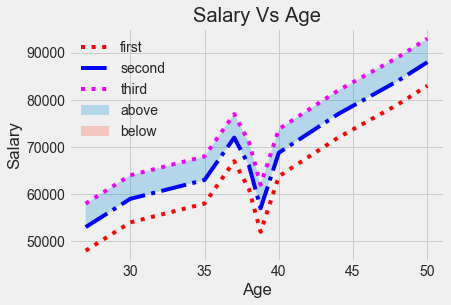

In [14]:
plt.style.use('fivethirtyeight')
df_sort = dataset.sort_values('Age')
x = df_sort.iloc[:,1].values
y = df_sort.iloc[:,2].values
plt.plot(x, y, color='red', linestyle='dotted', label='first')
plt.plot(x,y+5000, color='blue', linestyle='-.', label='second')
plt.plot(x, y+10000, color='#f003fc', linestyle=':', label='third')
plt.fill_between(x, y+10000,y+5000,where=(y+5000 < y+10000), interpolate=True, alpha=0.25, label='above')
plt.title('Salary Vs Age')
plt.fill_between(x, y+10000,y+5000,where=(y+5000 > y+10000), interpolate=True, alpha=0.25, label='below')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='best')
plt.show()
#help(plt.legend)

# HISTOGRAM 

In [15]:
data_hist = pd.read_csv('.\\files\\data_histogram.csv')
data_hist.head()

,Responder_id,Age
0,1,14
1,2,19
2,3,28
3,4,22
4,5,30


In [16]:
ages = data_hist['Age']

Text(0, 0.5, 'respondents')

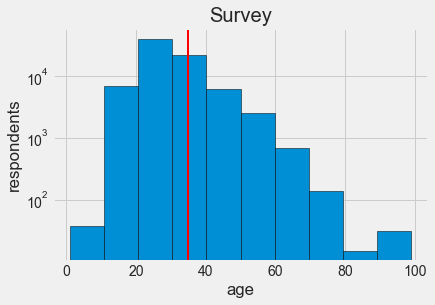

In [17]:
plt.hist(ages, edgecolor='black', log=True)
plt.axvline(35, color='red', linewidth=2)
plt.title('Survey')
plt.xlabel('age')
plt.ylabel('respondents')

# SCATTER PLOT

In [18]:
df_s = pd.read_csv('.\\files\\data_scatter.csv')
df_s.head()

,view_count,likes,ratio
0,8036001,324742,96.91
1,9378067,562589,98.19
2,2182066,273650,99.38
3,6525864,94698,96.25
4,9481284,582481,97.22


In [19]:
views = df_s['view_count']
likes = df_s['likes']
ratio = df_s['ratio']

Text(0, 0.5, 'Likes')

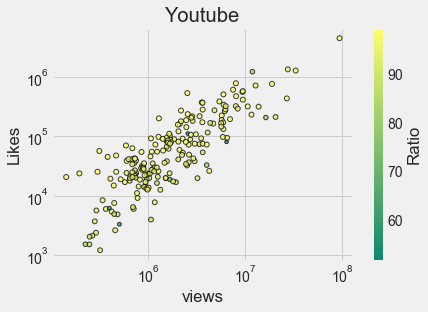

In [20]:
plt.scatter(views, likes, s=ratio, c=ratio, cmap='summer', edgecolors='black', linewidth=1, alpha=0.75, marker='.')
plt.colorbar().set_label('Ratio')
plt.xscale('log')
plt.yscale('log')
plt.title('Youtube')
plt.xlabel('views')
plt.ylabel('Likes')

# TIME SERIES PLOT

In [21]:
df_t = pd.read_csv('.\\files\\data_timeseries.csv')
df_t.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-18,7266.080078,8281.660156,7257.259766,8193.139648,8193.139648,723011166
1,2019-05-19,8193.139648,8193.139648,7591.850098,7998.290039,7998.290039,637617163
2,2019-05-20,7998.290039,8102.319824,7807.770020,7947.930176,7947.930176,357803946
3,2019-05-21,7947.930176,8033.759766,7533.660156,7626.890137,7626.890137,424501866
4,2019-05-22,7626.890137,7971.259766,7478.740234,7876.500000,7876.500000,386766321


In [22]:
df_t.sort_values('Date', inplace=True)
df_t['Date'] = pd.to_datetime(df_t['Date'])
dates = df_t['Date']
closing_price = df_t['Close']

C:\Users\Bala\Python\Anaconda3\envs\playground\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


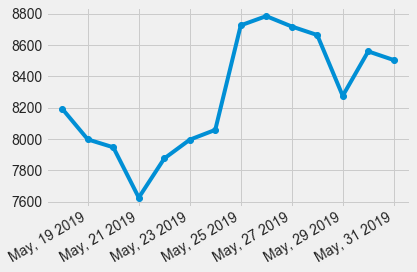

In [23]:
from matplotlib import dates as mpl_dates
from datetime import datetime, timedelta
plt.plot_date(dates, closing_price, linestyle='-')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()

# LIVE PLOT

In [24]:
#lIve data plot not possible in jupyter, possible in spyder
from matplotlib.animation import FuncAnimation
def animate(i):
    df_live = pd.read_csv('.\\files\\data_live.csv')
    x = df_live['x_value']
    y1 = df_live['total_1']
    y2 = df_live['total_2']
    plt.cla()
    plt.plot(x, y1, label='channel 1')
    plt.plot(x, y2, label='channel 1')
    plt.legend()

ani = FuncAnimation(plt.gcf(), animate, interval=1000)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

# SUB PLOT 

In [25]:
df_sub = pd.read_csv('.\\files\\data_subplot.csv')
df_sub.head()
age = df_sub['Age']
JavaScript = df_sub['JavaScript']
All_Devs = df_sub['All_Devs']
Python = df_sub['Python']

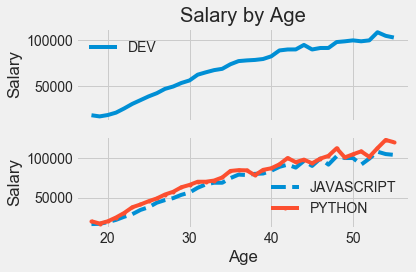

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(age, All_Devs, linestyle='-', label='DEV')
ax2.plot(age, JavaScript, linestyle='--', label='JAVASCRIPT')
ax2.plot(age, Python, marker='.', label='PYTHON')

ax1.set_title('Salary by Age')
ax2.set_xlabel('Age')
ax1.set_ylabel('Salary')
ax2.set_ylabel('Salary')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

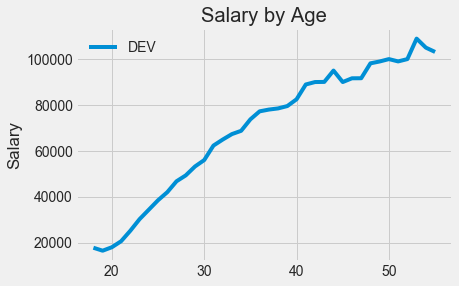

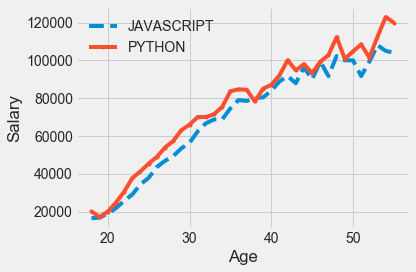

In [27]:
fig1, axe1 = plt.subplots()
fig2, axe2 = plt.subplots()

axe1.plot(age, All_Devs, linestyle='-', label='DEV')
axe2.plot(age, JavaScript, linestyle='--', label='JAVASCRIPT')
axe2.plot(age, Python, marker='.', label='PYTHON')

axe1.set_title('Salary by Age')
axe2.set_xlabel('Age')
axe1.set_ylabel('Salary')
axe2.set_ylabel('Salary')
axe1.legend()
axe2.legend()
plt.tight_layout()
plt.show()

In [28]:
import seaborn as sns

df_sns = sns.load_dataset('tips')
df_sns.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
df_sns.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [30]:
df_sns.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


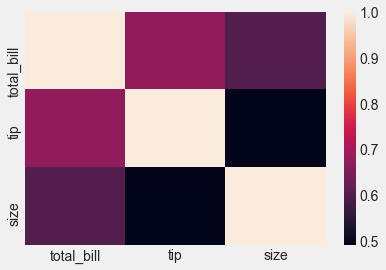

In [31]:
sns.heatmap(df_sns.corr())

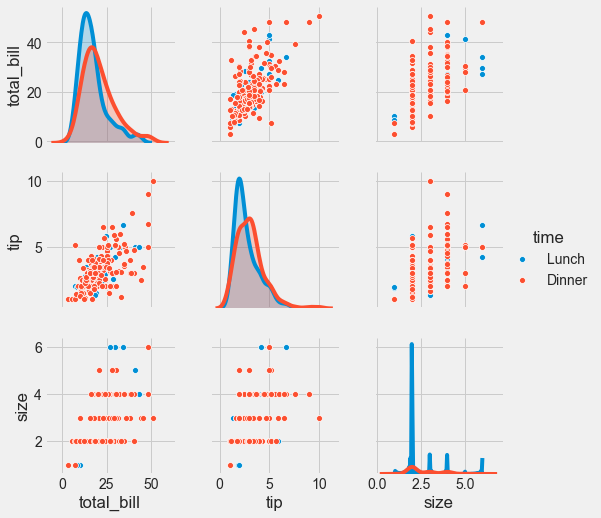

In [32]:
sns.pairplot(df_sns, hue='time')

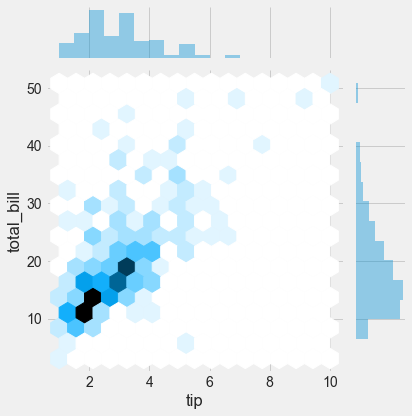

In [33]:
sns.jointplot(x='tip', y='total_bill', data=df_sns, kind='hex')

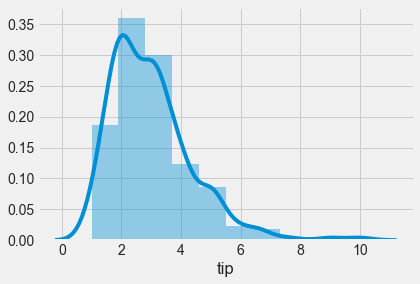

In [34]:
sns.distplot(df_sns['tip'], bins=10)

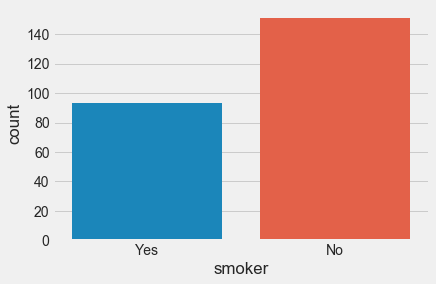

In [35]:
sns.countplot(x='smoker', data=df_sns)

In [36]:
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [38]:
df_iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


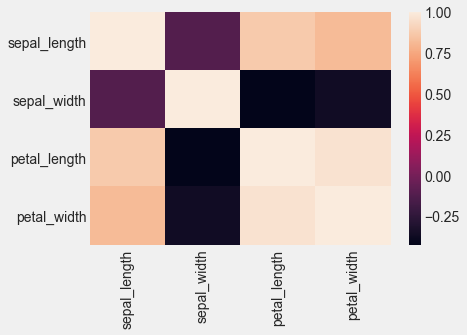

In [39]:
sns.heatmap(df_iris.corr())

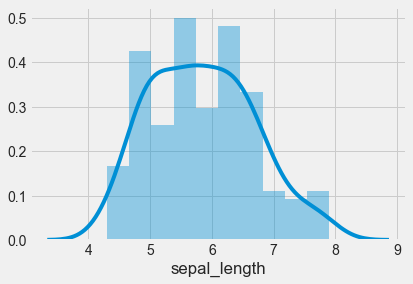

In [40]:
sns.distplot(df_iris['sepal_length'], bins=10)

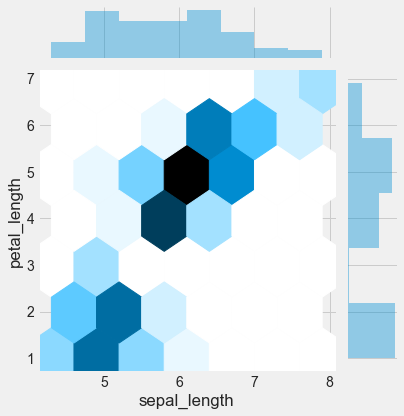

In [41]:
sns.jointplot(x='sepal_length', y='petal_length', data=df_iris, kind='hex')

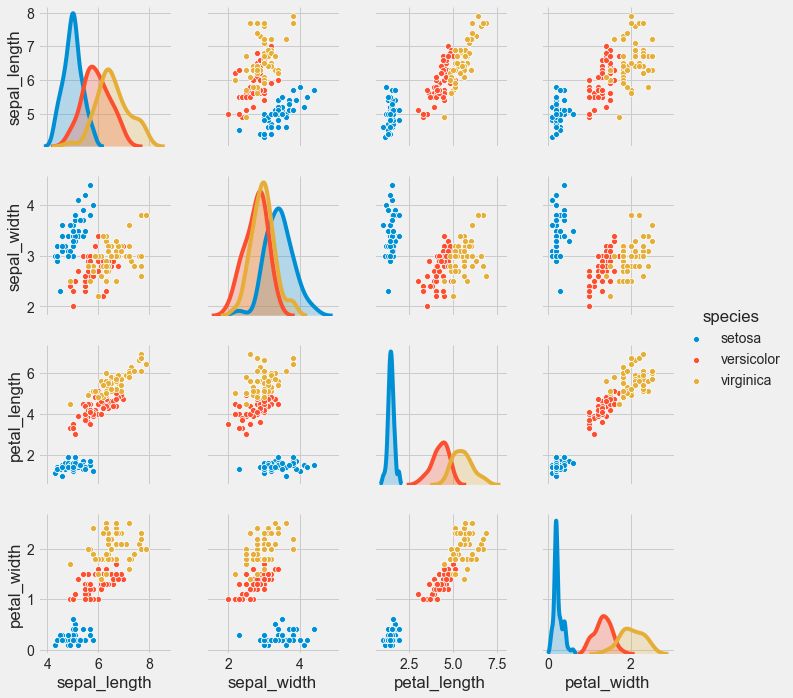

In [42]:
sns.pairplot(df_iris, hue='species')

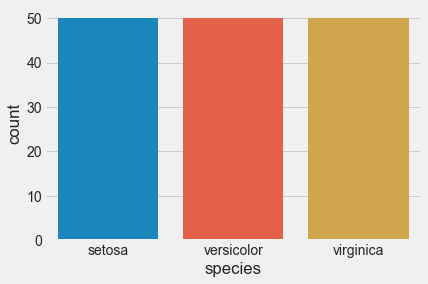

In [43]:
sns.countplot(df_iris['species'])

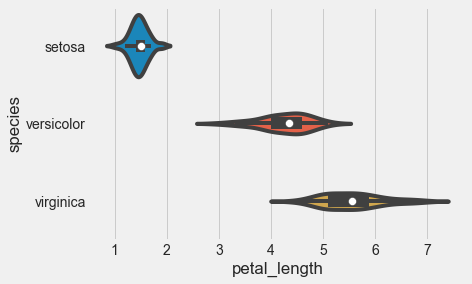

In [44]:
sns.violinplot(x='petal_length', y='species', data=df_iris)

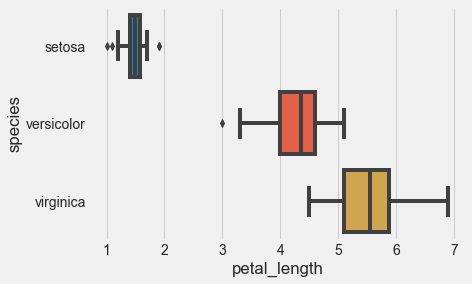

In [45]:
sns.boxplot(x='petal_length', y='species', data=df_iris)

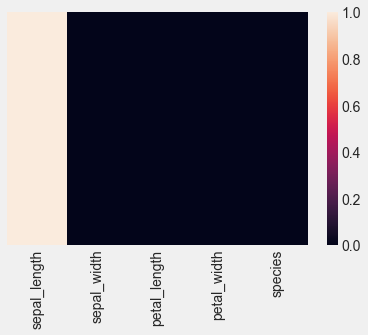

In [46]:
sns.heatmap(df_iris.isin(df_iris['sepal_length']), yticklabels=False, cbar=True)